# H20 AutoML Heart Attack Prediction

Aadit Shah

## Abstract

The goal is to construct a model to predict the chances of having a heart attack from a heart attack analysis dataset. The dataset has 303 rows of heart attack predictions based on numerous factors. The factors are as below - 

The features in the Dataset are -

1. **Age**: Age of the patient. DataType - Numerical
2. **Sex**: Sex of the patient. DataType - Categorical
3. **exang**: Exercise induced angina (1 = yes; 0 = no). DataType - Categorical
4. **caa**: Number of major vessels (0-3). DataType - Categorical
5. **cp** : Chest Pain type chest pain type. DataType - Categorical
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
6. **trtbps : resting blood pressure (in mm Hg). DataType - Numerical

7. **chol** : cholestoral in mg/dl fetched via BMI sensor. DataType - Numerical

8. **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false). DataType - Categorical

9. **rest_ecg** : resting electrocardiographic results. DataType - Categorical

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved. DataType - Numerical

10. **Olpeak**: This represents the amount by which a specific portion of an electrocardiogram (ECG or EKG) drops or goes lower than its baseline level during and after physical exercise. DataType - Numerical


Dependant Variable - 
**output** : This is the dependant variable. 0= less chance of heart attack 1= more chance of heart attack. DataType - Categorical


We performed the following tasks:

1. **Exploratory Data Analysis** (EDA):
   - Conducted exploratory data analysis to understand the structure and characteristics of my dataset.
   - Investigated the distribution of variables, checked for missing values, and identified potential outliers.

2. **Data Visualization:**
   - Created various data visualizations, including histograms, scatter plots, and box plots, to provide insights into my data.
   - Visualized the relationships between variables and their distributions.

3. **Data Preprocessing:**
   - Cleaned the dataset by handling missing values and potentially outliers.
   - Encoded categorical variables when necessary for machine learning.
   - Split the dataset into training and testing sets for model evaluation.

4. **Model Building:**
   - Built machine learning models to predict specific outcomes.
   - Explored a variety of algorithms, such as Gradient Boosting, Random Forest, and Linear Regression, to determine the best-performing model.

5. **Hyperparameter Tuning:**
   - Performed hyperparameter tuning using techniques like GridSearchCV to optimize the models.
   - Fine-tuned the models to achieve the best predictive performance.

6. **Model Evaluation:**
   - Evaluated model performance using metrics such as RMSE, MSE, MAE, and R-squared.
   - Visualized model results to interpret the model's predictions and their accuracy.

7. **Statistical Analysis:**
   - Conducted statistical analysis, such as the Variance Inflation Factor (VIF) to assess multicollinearity among independent variables.

9. **Considered Model Interpretability:**
   - Assessed the interpretability of the models and considered whether they make sense in the context of my data.

The results include accuracy of 83.6% in the classification model. 


## Importing Required Modules and H20 Initialization

AutoML or Automated Machine learning is a set of tool and techniques that are automate training, testing and deployment of Machine Learning models and solving real world problems.

H2O AutoML is an automated machine learning platform from H2O.ai. It streamlines the model development process by automating tasks like algorithm selection, hyperparameter tuning, and model evaluation. It offers a user-friendly interface and is scalable for large datasets. Users can quickly build machine learning models without deep technical expertise but should still understand their data and results for effective use.

H20 AutoML is a automl tool created by the company H20.ai. This tool is useful for streamlining model development process by automating tasks like parameter selection, tuning and model training and evaluation. Users having a basic understanding of their data can use the H20 AutoML for building their Machine learning models without having deep techincal understanding of Machine learning algorithms. 

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [4]:
import h2o
import os
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
min_memory_size=5
run_time=240

### Finding the minimum memory required to run the Machine learning Process/Analysis

As per the analysis minimum 2GB of memory is required to run the machine learning process. 

In [6]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_memory_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_memory_size)

2


In [8]:
port_no=random.randint(5555,55555) # Select a random port to start H20 on

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_memory_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:8270..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20.0.2" 2023-07-18; Java(TM) SE Runtime Environment (build 20.0.2+9-78); Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from /Users/aadit/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/tmp00w6jpmf
  JVM stdout: /var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/tmp00w6jpmf/h2o_aadit_started_from_python.out
  JVM stderr: /var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/tmp00w6jpmf/h2o_aadit_started_from_python.err
  Server is running at http://127.0.0.1:8270
Connecting to H2O server at http://127.0.0.1:8270 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_aadit_u0b691
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


After initializing H20 we are creating a H20 dataframe

In [10]:
# Read the heart attack prediction dataset from kaggle and check the data
import opendatasets as od

PATH = './heart-attack-analysis-prediction-dataset/heart.csv'
data1 = "https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset"
od.download(data1)
df_pandas = pd.read_csv(PATH)



Skipping, found downloaded files in "./heart-attack-analysis-prediction-dataset" (use force=True to force download)


In [11]:
df = h2o.import_file(path=PATH)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
df_pandas.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.head()

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [14]:
df_pandas.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'] but received: Address

In [19]:
df.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trtbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalachh': 'int',
 'exng': 'int',
 'oldpeak': 'real',
 'slp': 'int',
 'caa': 'int',
 'thall': 'int',
 'output': 'int'}

In [20]:
df.shape

(303, 14)

In [21]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [22]:
df_train.shape
df_test.shape

(63, 14)

In [23]:
#Display all columns in X
x_columns = df.columns
print(x_columns)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [24]:
# Seperate Dependent variable from the Independent variables
y_numeric ='output'
x_columns.remove(y_numeric) 
print(x_columns)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


## Executing H20 AutoML

In [25]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [26]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1, project_name="classification")

In [27]:
#pass the data through H20AutoML
aml.train(x=x_columns,y=y_numeric,training_frame=df_train) 

AutoML progress: |
02:13:13.50: AutoML: XGBoost is not available; skipping it.
02:13:13.67: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:13:13.253: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:13:13.269: GBM_1_AutoML_1_20231102_21313 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20231102_21313.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 192.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (w

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20231102_21313_model_40


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          6644                   4            9            5.46875       11            14            11.9062

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.06976126056623493
RMSE: 0.2641235706373722
MAE: 0.19914799954858609
RMSLE: 0.19000750021072166
Mean Residual Deviance: 0.06976126056623493

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.12675577941988328
RMSE: 0.35602777900029553
MAE: 0.2726536713697923
RMSLE: 0.2494570030012782
Mean Residual Deviance: 0.12675577941988328

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.271822  0.0312932  0.307206      0.286908      0.277575      0.264006      0.223415
mean_residual_deviance  0.130553  0.0288671  0.154222      0.161356      0.118142      0.129342      0.089704
mse                     0.130553  0.0288671  0.154222      0.161356      0.118142      0.129342      0.089704
r2                      0.471054  0.118491   0.37332       0.344329      0.519933      0.479013      0.638675
residual_deviance       0.130553  0.0288671  0.154222      0.161356      0.118142      0.129342      0.089704
rmse                    0.359454  0.0410229  0.392711      0.401692      0.343717      0.359642      0.299506
rmsle                   0.251921  0.0294956  0.272802      0.284619      0.236413      0.255355      0.210418

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-11-02 02:17:01  3.021 sec   0                  0.497057         0.494132        0.247066
    2023-11-02 02:17:01  3.034 sec   5                  0.404516         0.393744        0.163633
    2023-11-02 02:17:01  3.044 sec   10                 0.35173          0.324877        0.123714
    2023-11-02 02:17:01  3.053 sec   15                 0.318469         0.275705        0.101422
    2023-11-02 02:17:01  3.070 sec   20                 0.297013         0.242161        0.0882167
    2023-11-02 02:17:01  3.081 sec   25                 0.2822           0.220085        0.0796371
    2023-11-02 02:17:01  3.098 sec   30                 0.269347         0.20382         0.072548
    2023-11-02 02:17:01  3.107 sec   32                 0.264124         0.199148        0.0697613

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
cp          53.4884                1                    0.238826
caa         39.3673                0.735996             0.175775
thall       38.3667                0.71729              0.171308
oldpeak     27.2856                0.510122             0.12183
thalachh    13.6616                0.255412             0.0609991
chol        11.3739                0.212642             0.0507846
age         10.7674                0.201304             0.0480766
sex         9.43325                0.176361             0.0421195
slp         6.74974                0.126191             0.0301376
exng        4.69965                0.087863             0.020984
trtbps      4.51106                0.0843371            0.0201419
restecg     3.02412       

In [28]:
print(aml.leaderboard)

model_id                                                             rmse       mse       mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20231102_21313_model_40                      0.356028  0.126756  0.272654  0.249457                  0.126756
GBM_grid_1_AutoML_1_20231102_21313_model_38                      0.358235  0.128333  0.28543   0.252026                  0.128333
GBM_lr_annealing_selection_AutoML_1_20231102_21313_select_model  0.359317  0.129109  0.280415  0.253046                  0.129109
StackedEnsemble_BestOfFamily_6_AutoML_1_20231102_21313           0.35952   0.129254  0.274513  0.252258                  0.129254
GBM_grid_1_AutoML_1_20231102_21313_model_34                      0.360455  0.129928  0.289506  0.254134                  0.129928
GBM_grid_1_AutoML_1_20231102_21313_model_9                       0.361696  0.130824  0.279557  0.254272                  0.130824
GBM_4_AutoML_1_20231102_21313                                    0.362061  0.131088  0.276

### Interpreting the above results

Each row in the table represents a different model, and the columns provide various performance metrics for each model.

1. model_id: Each model is identified by a unique ID and this ID is called as model ID. 

2. rmse (Root Mean Squared Error): RMSE is a common regression metric that measures the average magnitude of the errors between predicted and actual values. Lower values indicate better model performance.



3. mse (Mean Squared Error): MSE is another regression metric that calculates the average of the squared errors between predicted and actual values. Like RMSE, lower values are better.

4. mae (Mean Absolute Error): MAE measures the average absolute differences between predicted and actual values. It provides a sense of the average magnitude of errors.

5. rmsle (Root Mean Squared Logarithmic Error): RMSLE is a variation of RMSE that applies a logarithmic transformation to the values. It is often used for models where the target variable has a wide range of values.

6. mean_residual_deviance: This is another metric related to the average squared differences between predicted and actual values. Like RMSE and MSE, lower values are better.

The table provides a comparison of these metrics for different models, allowing us to assess which model performs best based on the specific metrics (e.g., RMSE, MSE, MAE). The model with the lowest values for these metrics is considered the best-performing model.

In this specific report, the model "GBM_grid_2_AutoML_3_20231029_190132_model_44" has the lowest RMSE (0.334626), MSE (0.111975), and MAE (0.248679), which suggests it might be the top-performing model in the set.

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trtbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalachh,42.742178
8,exng,2.022527
9,oldpeak,3.062890


In [62]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('output ~ age + sex + cp + trtbps + chol + fbs + restecg + thalachh + exng + oldpeak + slp + caa + thall', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.49e-38
Time:                        19:13:09   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trtbps        -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalachh       0.0030      0.001      2.671      0.008       0.001       0.005
exng          -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slp            0.0790      0.042      1.863      0.063      -0.004       0.162
caa           -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thall         -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VIF Stands for Variable Inflation Factor. It is used to check multicollinearity between a set a independant variables. If the value of VIF is greater than 10 it indicates that the independant variable is highly correlated with some other variables. We will calculate VIF for all variables to check the dependency and the variables with high VIF can be dropped. 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df_pandas[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trtbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalachh,42.742178
8,exng,2.022527
9,oldpeak,3.062890


Variables with high VIF values, such as age, trtbps, chol, and thalachh, exhibit strong multicollinearity with other variables and may need further investigation or consideration for removal from a predictive model to improve its performance. 

## Hyperparameter Tuning

To find the best set of hyperparameters for a given dataset, hyperparameter tuning is used. It searches different values for model hyperparameters and it chooses the results that achieves the best performance on the given dataset. 

In [47]:
X = df_pandas.drop(columns=['output'])  # Features
y = df_pandas['output']  # Target variable


In [48]:
# Test train and split the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the model on the training data with the best hyperparameters
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = best_rf_classifier.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Hyperparameters:", accuracy)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy with Best Hyperparameters: 0.8360655737704918


### Create the heat map of the correlation

<Axes: >

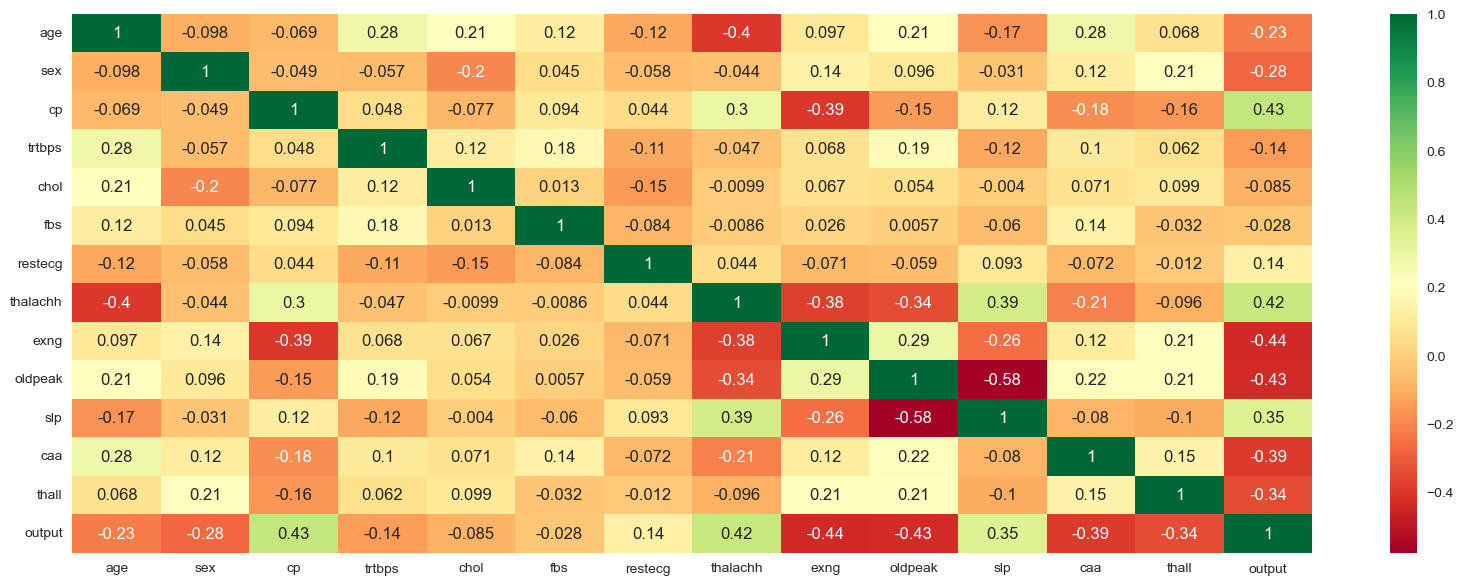

In [33]:
plt.figure(figsize=(20,7))
sns.heatmap(df_pandas.corr(), annot=True, cmap='RdYlGn')

### The importance of every variables

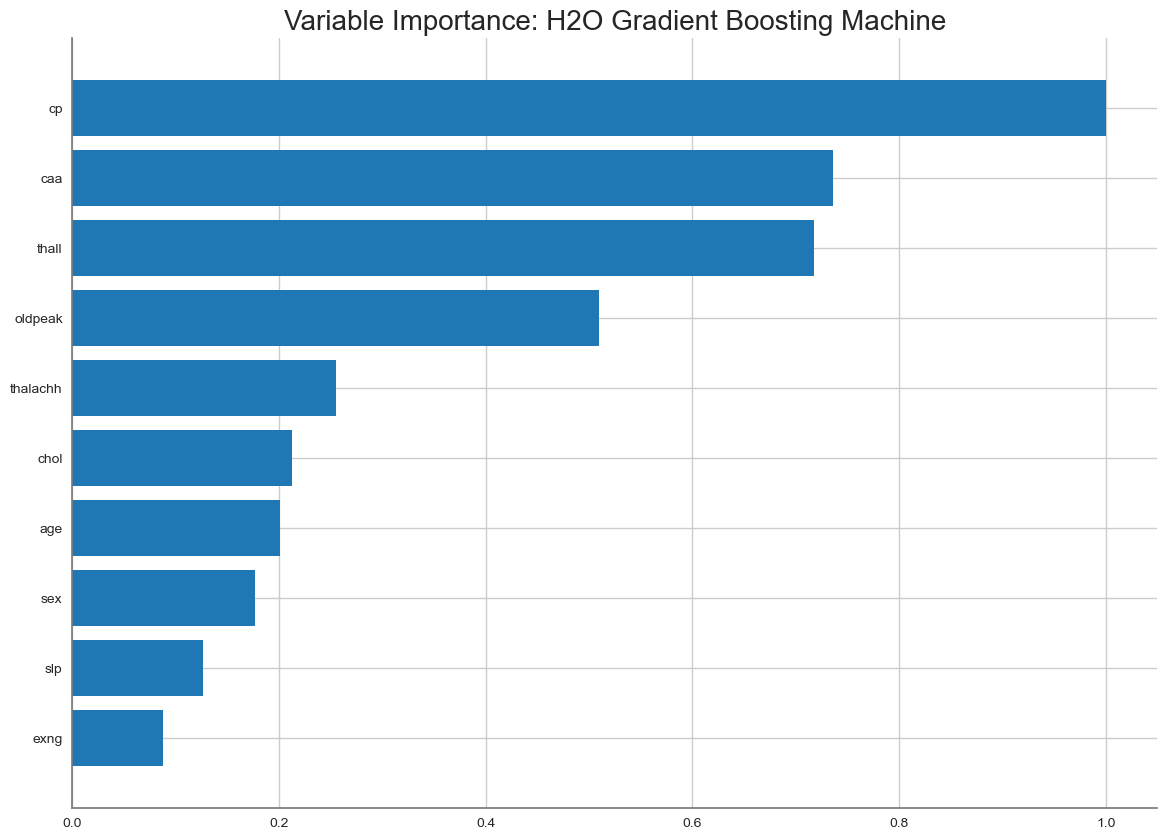

<Figure size 800x550 with 0 Axes>

In [40]:
best_model = aml.leader
%matplotlib inline
best_model.varimp_plot()


Assignment Question/Answers
Q1) Is the relationship significant?
A) No, the relationship is not very significant since R squared value of the dependant variable is 0.518 and the p value of age, trtbps, chol, and thalachh are high.  

Q2) Are any model assumptions violated? 
A) No assumptions are violated since the dependant variable is 0 or 1 and this is a classification question which makes sense in the AutoML models. 

Q3) Is there any multicollinearity in the model? 
A) Yes. We can see from the VIF data that "age", "trtbps", "chol", and "thalachh", exhibit strong multicollinearity with other variables.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?
A) The analysis indicates that the "sex" and "cp" variables are statistically significant and not independent of the other predictor variables, whereas some of the other variables may be relatively independent due to their low coefficients and higher p-values.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. 
A) The most significant variables are Chest Pain (cp), Sex(sex), Number of Major Vessels (caa):, Thalium Stress Test (thall).
Variables such as age, trtbps (resting blood pressure), chol (cholesterol levels), fbs (fasting blood sugar), restecg (resting electrocardiographic results), exng (exercise-induced angina), oldpeak, and slp (slope of the peak exercise ST segment) are less significant as their coefficients are close to zero or their p-values are above 0.05.


Q6) Does the model make sense? For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.76 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help? 
A) Yes, regularization helps. Regularization is a method used in machine learning to control the complexity of a model. It helps prevent the model from becoming too sensitive to small variations in the data. The goal of regularization is to improve the model's ability to make accurate predictions. To see if it's working, we run tests with and without regularization and compare the results.

Q8) Which independent variables are significant?
A) Variables are significant when p-value is less than 0.05. The most significant independant variables are Chest Pain (cp), Sex(sex), Number of Major Vessels (caa):, Thalium Stress Test (thall).


Q9) Which hyperparameters are important? 
A) The best hyperparameters for this model are:- 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200. 

## LICENSE
MIT License

Copyright (c) 2023 Aadit Shah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## REFERENCES

H20.ai- https://docs.h2o.ai/
OLS Model- http://net-informations.com/ds/mla/ols.html
Dataset- https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
Professor's AutoML Notebook- 
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb